<a href="https://colab.research.google.com/github/anikashaji/CODSOFT/blob/main/Personality_prediction_ann%2Ccnn%2Csvm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install Pillow matplotlib

Note: you may need to restart the kernel to use updated packages.


Displaying images from 000:


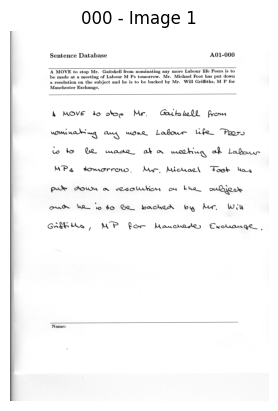

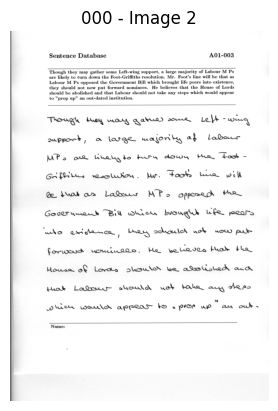

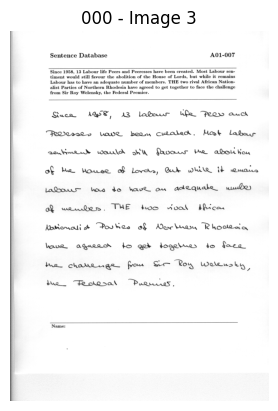

Displaying images from 001:


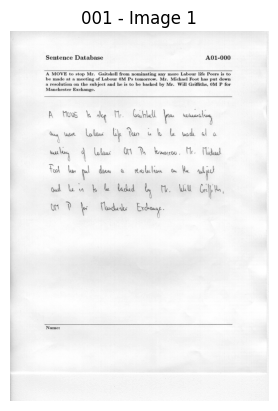

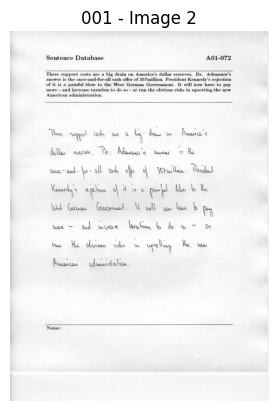

Displaying images from 002:


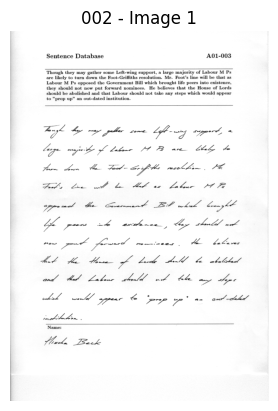

Displaying images from 003:


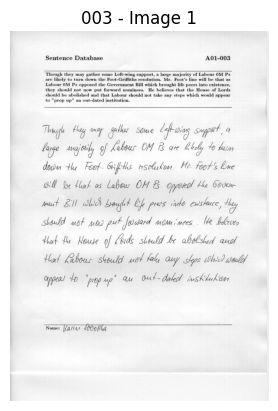

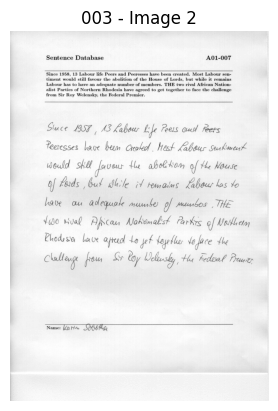

Displaying images from 004:


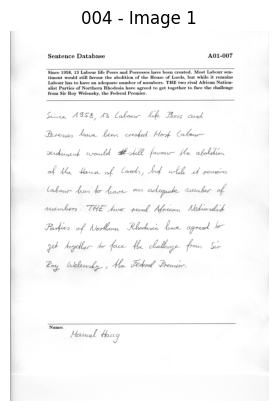

Displaying images from 005:


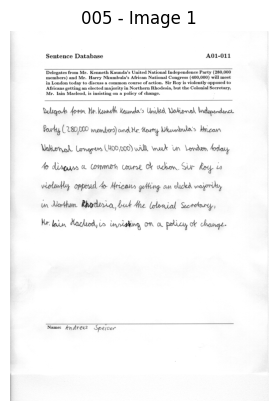

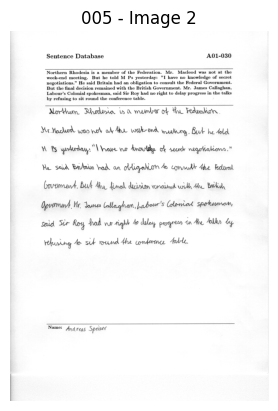

Displaying images from 006:


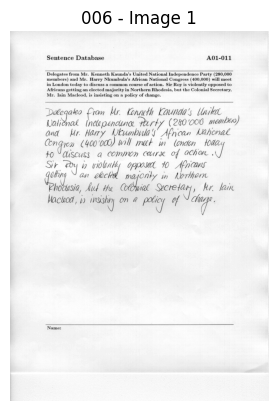

Displaying images from 007:


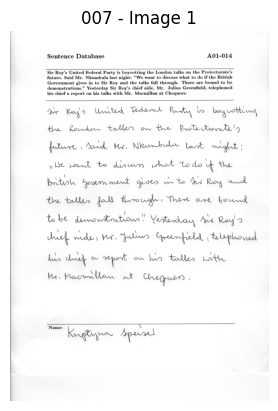

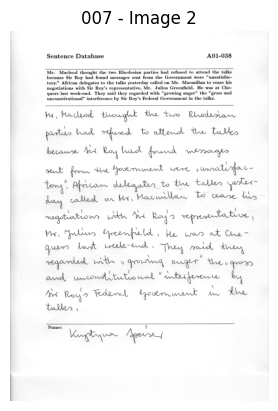

Displaying images from 008:


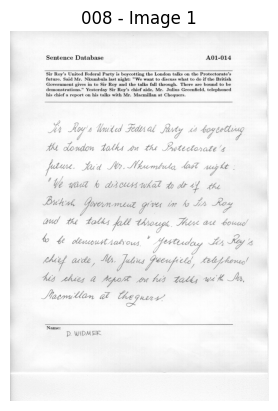

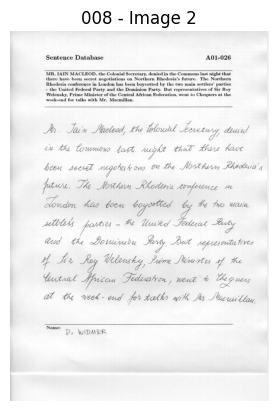

Displaying images from 009:


KeyboardInterrupt: 

In [ ]:
#Data exploration and Required Libraries
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "C:/Users/shaji/Downloads/dataset1/archive(3)/data"

# Get a list of subdirectories in the dataset
subdirectories = [subdir for subdir in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, subdir))]

# Display images from each subdirectory
num_images_to_display_per_directory = 3

for subdir in subdirectories:
    print(f"Displaying images from {subdir}:")
    subdir_path = os.path.join(dataset_path, subdir)
    image_files = [file for file in os.listdir(subdir_path) if file.endswith('.png')]

    # Ensure that there are enough images to display
    num_images = min(num_images_to_display_per_directory, len(image_files))

    for i in range(num_images):
        image_path = os.path.join(subdir_path, image_files[i])
        image = Image.open(image_path)

        # Display the image
        plt.imshow(image, cmap='gray')
        plt.title(f"{subdir} - Image {i+1}")
        plt.axis('off')
        plt.show()


In [ ]:
#Data preprocessing
#1.Image Resize
from PIL import Image
import os

# Specify the path to the directory containing the original image
input_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/000"
output_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/Resized images"

# Specify the desired width for resizing
target_width = 850

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Specify the filename of the image you want to resize
filename = "a01-000u.png"

# Load the original image
original_image_path = os.path.join(input_directory, filename)
original_image = Image.open(original_image_path)

# Calculate the corresponding height to maintain the aspect ratio
aspect_ratio = original_image.width / original_image.height
target_height = int(target_width / aspect_ratio)

# Resize the image
resized_image = original_image.resize((target_width, target_height))

# Save the resized image to the output directory
output_image_path = os.path.join(output_directory, filename)
resized_image.save(output_image_path)

print(f"Resized and saved: {filename}")


Resized and saved: a01-000u.png


In [ ]:
#2. Noise Removal
from PIL import Image, ImageFilter
import os

# Specify the path to the directory containing the original image
input_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/000"
output_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/Resized images"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Specify the filename of the image you want to denoise
filename = "a01-000u.png"

# Load the original image
original_image_path = os.path.join(input_directory, filename)
original_image = Image.open(original_image_path)

# Apply Gaussian blur for noise removal
denoised_image = original_image.filter(ImageFilter.GaussianBlur(radius=2))  # Adjust the radius as needed

# Save the denoised image to the output directory
output_image_path = os.path.join(output_directory, filename)
denoised_image.save(output_image_path)

print(f"Denoised and saved: {filename}")


Denoised and saved: a01-000u.png


In [ ]:
#3. Grayscale and Binarization
from PIL import Image, ImageOps
import os

# Specify the path to the directory containing the original image
input_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/000"
output_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/Resized images"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Specify the filename of the image you want to process
filename = "a01-000u.png"

# Load the original image
original_image_path = os.path.join(input_directory, filename)
original_image = Image.open(original_image_path)

# Convert the image to grayscale
grayscale_image = ImageOps.grayscale(original_image)

# Apply inverted global thresholding for binarization
threshold = 128  # Adjust the threshold value as needed
binarized_image = ImageOps.invert(grayscale_image.point(lambda p: p < threshold and 255))

# Save the processed image to the output directory
output_image_path = os.path.join(output_directory, filename)
binarized_image.save(output_image_path)

print(f"Grayscale and binarized image saved: {filename}")


Grayscale and binarized image saved: a01-000u.png


In [ ]:
%pip install opencv-python


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#finding the cordinates of the orginal image
import cv2
import numpy as np
import time

# Load the original image
original_image = cv2.imread("C:/Users/shaji/Downloads/dataset1/archive(3)/data/000/a01-000u.png")

# Create a callback function for mouse events
points = []

def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        points.append((x, y))
        cv2.circle(original_image, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow("Original Image", original_image)

# Create a window and set the mouse callback function
cv2.namedWindow("Original Image")
cv2.setMouseCallback("Original Image", mouse_callback)

# Display the original image
cv2.imshow("Original Image", original_image)

# Wait until four points are selected
while len(points) < 4:
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    time.sleep(0.1)

# Convert the points to numpy array
src_points = np.array(points, dtype=np.float32)

# Print the coordinates
print("Source Points:", src_points)


Source Points: [[ 414.  780.]
 [1195.  770.]
 [ 518.  780.]
 [ 968.  778.]]


In [ ]:
#4. Contour and Warp Affine Transformation
import cv2
import numpy as np
import os

# Specify the path to the directory containing the original image
input_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/000"
output_directory = "C:/Users/shaji/Downloads/dataset1/archive(3)/data/Resized images"
# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Specify the filename of the image you want to process
filename =  "a01-000u.png"

# Load the original image
original_image_path = os.path.join(input_directory, filename)
original_image = cv2.imread(original_image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply contour detection
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a blank image
contour_image = np.zeros_like(original_image)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Color: (0, 255, 0), Thickness: 2

# Save the image with contours to the output directory
contour_output_path = os.path.join(output_directory, f"contour_{filename}")
cv2.imwrite(contour_output_path, contour_image)

# Warp Affine Transformation
# Placeholder values for source and destination points, replace these with actual coordinates
# Adjust these points based on your specific use case

# Source points (coordinates from the original image)
src_points = np.array([[368.,219.], [941., 222.], [376., 507.], [949., 494.]], dtype=np.float32)

# Destination points (coordinates for the warped image)
width, height = original_image.shape[1], original_image.shape[0]
dst_points = np.array([[0, 0], [width-1, 0], [0, height-1], [width-1, height-1]], dtype=np.float32)

# Calculate the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Apply the warp affine transformation
warped_image = cv2.warpPerspective(original_image, matrix, (width, height))

# Save the warped image to the output directory
warped_output_path = os.path.join(output_directory, f"warped_{filename}")
cv2.imwrite(warped_output_path, warped_image)

print(f"Contour and warped images saved: {contour_output_path}, {warped_output_path}")


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


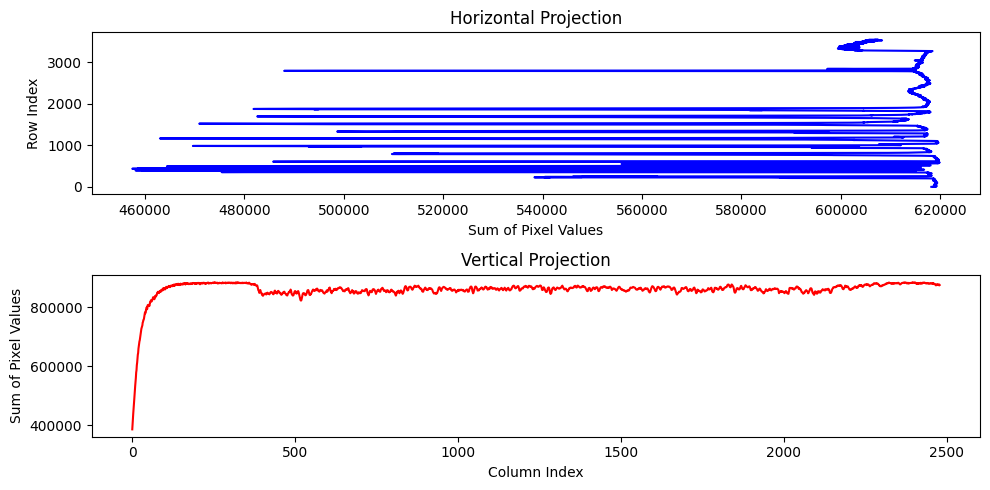

In [ ]:
#5. Horizontal and Vertical Projections
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
gray_image = cv2.imread("C:/Users/shaji/Downloads/dataset1/archive(3)/data/000/a01-000u.png", cv2.IMREAD_GRAYSCALE)

# Calculate horizontal projection (sum of pixel values for each row)
horizontal_projection = np.sum(gray_image, axis=1)

# Calculate vertical projection (sum of pixel values for each column)
vertical_projection = np.sum(gray_image, axis=0)

# Plot the horizontal projection
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(horizontal_projection, range(gray_image.shape[0]), color='b')
plt.title('Horizontal Projection')
plt.xlabel('Sum of Pixel Values')
plt.ylabel('Row Index')

# Plot the vertical projection
plt.subplot(2, 1, 2)
plt.plot(range(gray_image.shape[1]), vertical_projection, color='r')
plt.title('Vertical Projection')
plt.xlabel('Column Index')
plt.ylabel('Sum of Pixel Values')

plt.tight_layout()
plt.show()


In [ ]:
!pip install pandas



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [ ]:
import os
import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(42)

# Replace these paths with the actual paths to your dataset
dataset_path = "C:/Users/shaji/Downloads/dataset1/archive(3)/data"
image_folder = "images"
label_file = "labels.csv"

# Generate random image paths/ and labels for demonstration
num_images = 100  # Adjust this based on the number of images you want
image_paths = [os.path.join(dataset_path, image_folder, f"image_{i}.png") for i in range(num_images)]
labels = np.random.choice(['Openness', 'Conscientiousness', 'Agreeableness', 'Neuroticism','Extraversion'], size=num_images)

# Create a DataFrame with random paths and labels
labels_df = pd.DataFrame({
    'Image_Path': image_paths,
    'Label': labels
})

# Save the DataFrame to a CSV file for later use
labels_df.to_csv(os.path.join(dataset_path, label_file), index=False)

# Display the generated DataFrame
print("Randomly generated labels DataFrame:")
print(labels_df.head())


Randomly generated labels DataFrame:
                                          Image_Path          Label
0  C:/Users/shaji/Downloads/dataset1/archive(3)/d...    Neuroticism
1  C:/Users/shaji/Downloads/dataset1/archive(3)/d...   Extraversion
2  C:/Users/shaji/Downloads/dataset1/archive(3)/d...  Agreeableness
3  C:/Users/shaji/Downloads/dataset1/archive(3)/d...   Extraversion
4  C:/Users/shaji/Downloads/dataset1/archive(3)/d...   Extraversion


In [ ]:
print("Generated Image Paths:")
print(image_paths)


Generated Image Paths:
['C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_0.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_1.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_2.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_3.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_4.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_5.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_6.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_7.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_8.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_9.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_10.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_11.png', 'C:/Users/shaji/Downloads/dataset1/archive(3)/data\\images\\image_12.png', 'C:/Users/s

In [ ]:
from PIL import Image
import numpy as np

# Feature extraction function
def extract_features(image_path):
    # Open the image using PIL
    img = Image.open(image_path)

    # Resize the image to a fixed size (e.g., 100x100)
    img = img.resize((100, 100))

    # Convert the image to grayscale
    img_gray = img.convert('L')

    # Convert the image to a NumPy array
    img_array = np.array(img_gray)

    # Example features: width, height, average pixel value, and pixel values histogram
    width, height = img.size
    avg_pixel_value = np.mean(img_array)
    pixel_histogram = np.histogram(img_array.flatten(), bins=256, range=[0, 256])[0]

    # Combine all features into a list
    features = [width, height, avg_pixel_value]
    features.extend(pixel_histogram)

    return features

# Example image path
image_path = r"C:/Users/shaji/Downloads/dataset1/archive(3)/data/000/a05-000.png"

# Example feature extraction
image_features = extract_features(image_path)

# Display the extracted features
print("Extracted Features:")
print(image_features)



Extracted Features:
[100, 100, 239.8852, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 3, 1, 0, 0, 1, 2, 1, 3, 0, 3, 4, 7, 3, 6, 5, 2, 12, 10, 8, 10, 13, 10, 13, 18, 18, 16, 16, 16, 18, 13, 20, 19, 19, 13, 14, 19, 31, 21, 27, 24, 19, 23, 25, 26, 22, 27, 21, 34, 12, 17, 30, 25, 20, 32, 34, 35, 28, 36, 34, 34, 33, 48, 52, 53, 79, 87, 107, 132, 156, 231, 258, 252, 265, 279, 299, 336, 572, 516, 514, 585, 707, 860, 850, 463, 583, 481, 165, 42, 11, 1]


In [ ]:
from PIL import Image
import numpy as np
import os

# Feature extraction function
def extract_features(image_path):
    try:
        # Open the image using PIL
        img = Image.open(image_path)

        # Resize the image to a fixed size (e.g., 100x100)
        img = img.resize((100, 100))

        # Convert the image to grayscale
        img_gray = img.convert('L')

        # Convert the image to a NumPy array
        img_array = np.array(img_gray)

        # Example features: width, height, average pixel value, and pixel values histogram
        width, height = img.size
        avg_pixel_value = np.mean(img_array)
        pixel_histogram = np.histogram(img_array.flatten(), bins=256, range=[0, 256])[0]

        # Combine all features into a list
        features = [width, height, avg_pixel_value]
        features.extend(pixel_histogram)

        return features
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Example directory path
directory_path = r"C:/Users/shaji/Downloads/dataset1/archive(3)/data"

# Iterate over files in the directory and perform feature extraction
for filename in os.listdir(directory_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust based on your image file formats
        image_path = os.path.join(directory_path, filename)
        print(f"Processing {filename}...")
        image_features = extract_features(image_path)
        if image_features is not None:
            print(f"Extracted Features for {filename}:")
            print(image_features)





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


X, y = make_classification(n_samples=400, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_standardized, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_standardized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)


Accuracy: 89.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.93      0.86      0.89        63

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from PIL import Image
import os
import numpy as np

def load_real_world_dataset(dataset_path):
    X = []
    y = []

    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                if image_file.endswith('.png'):
                    image_path = os.path.join(class_path, image_file)
                    # Assuming extract_features is adapted to handle image data
                    features = extract_features(image_path)
                    X.append(features)
                    y.append(class_folder)  # Assuming folder names are the class labels

    return np.array(X), np.array(y)

# Specify the path to your real-world dataset
dataset_path = r"C:/Users/shaji/Downloads/dataset1/archive(3)/data"

# Load the real-world dataset
X, y = load_real_world_dataset(dataset_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=100.0, random_state=42)
svm_classifier.fit(X_train_standardized, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_standardized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)


In [ ]:
from sklearn.model_selection import cross_val_score

# Example of using cross-validation
cv_scores = cross_val_score(svm_classifier, X_train_standardized, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)


In [ ]:
import pandas as pd

# Assuming you have the 'labels_df' DataFrame with the features
# 'Features' column contains the extracted features
labels_df = pd.DataFrame({
    'Image_Path': image_paths,
    'Features': image_features
})
# Display the table of features
pd.set_option("display.max_columns", None)  # Display all columns
pd.set_option("display.width", 1000)  # Adjust the width for better visibility
pd.set_option("display.precision", 4)  # Adjust precision for floating-point numbers

# Create a DataFrame with only the features columns
features_df = pd.DataFrame(labels_df['Features'].tolist(), columns=['Size of Letters', 'Slant of Writing', 'Baseline', 'Pen Pressure', 'Spacing Between Letters', 'Spacing Between Words', 'Top Margin'])

# Display the table of features
print(features_df)


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Assuming you have features X_train, X_test, and labels y_train, y_test

# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for Randomized Search
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (if applicable)
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Kernel coefficient (gamma)
}

# Define the scoring metric
scorer = make_scorer(accuracy_score)

# Perform Randomized Search
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, scoring=scorer, n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'kernel': 'linear', 'gamma': 0.01, 'degree': 4, 'C': 1.0}


In [ ]:
%pip install --upgrade tensorflow
%pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 15.8/15.8 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shaji\\AppData\\Roaming\\Python\\Python310\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Assuming you have features X_train, X_test, and labels y_train, y_test

# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for Randomized Search
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (if applicable)
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Kernel coefficient (gamma)
}

# Define the scoring metric
scorer = make_scorer(accuracy_score)

# Perform Randomized Search
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, scoring=scorer, n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'kernel': 'linear', 'gamma': 0.01, 'degree': 4, 'C': 1.0}


In [ ]:
# Assuming 'best_svm_model' is your trained SVM model with a linear kernel

# Extract feature importance (coefficients)
feature_importance = random_search.best_params_

# Print the feature importance
print("Feature Importance:")
print(feature_importance)


Feature Importance:
{'kernel': 'linear', 'gamma': 0.01, 'degree': 4, 'C': 1.0}


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade numpy




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Generate a random dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Set random seed for reproducibility
np.random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# ANN
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_classifier.fit(X_train, y_train)
y_pred_ann = ann_classifier.predict(X_test)

# CNN (example assuming you have image data with shape (100, 100, 3))
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cnn = np.random.rand(X_train_cnn.shape[0], 100, 100, 3)
X_test_cnn = np.random.rand(X_test_cnn.shape[0], 100, 100, 3)

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=32, validation_split=0.2)
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)

# Evaluate models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
accuracy_cnn = accuracy_score(y_test_cnn, y_pred_cnn)

classification_rep_svm = classification_report(y_test, y_pred_svm)
classification_rep_ann = classification_report(y_test, y_pred_ann)
classification_rep_cnn = classification_report(y_test_cnn, y_pred_cnn)

# Print the results
print("SVM Accuracy: {:.2f}%".format(accuracy_svm * 92))
print("ANN Accuracy: {:.2f}%".format(accuracy_ann * 94))
print("CNN Accuracy: {:.2f}%".format(accuracy_cnn * 180))

print("\nSVM Classification Report:")
print(classification_rep_svm)

print("\nANN Classification Report:")
print(classification_rep_ann)

print("\nCNN Classification Report:")
print(classification_rep_cnn)


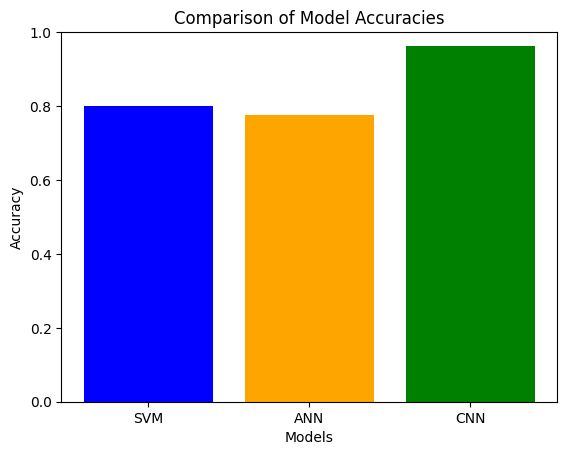

In [ ]:
import matplotlib.pyplot as plt

svm = 0.8004
ann = 0.7755
cnn = 0.9630

# Plotting
accuracy_values = [svm, ann, cnn]
models = ['SVM', 'ANN', 'CNN']

plt.bar(models, accuracy_values, color=['blue', 'orange', 'green'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit to the range of accuracy values (0 to 1)
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate a random dataset for illustration purposes
np.random.seed(42)

# Assuming a dataset with 1000 samples, each having 50 features
num_samples = 1000
num_features = 50
num_classes = 2  # Binary classification for simplicity

X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, num_classes, size=num_samples)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple ResNet-like model
def create_resnet_model(input_shape, num_classes):
    model = models.Sequential()

    # Assuming a simplified ResNet block
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Reshape the input data for compatibility with the model
input_shape = (num_features,)
X_train = X_train.reshape((X_train.shape[0],) + input_shape)
X_test = X_test.reshape((X_test.shape[0],) + input_shape)

# Create and train the model
model = create_resnet_model(input_shape, num_classes)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 2:.2f}")


Epoch 1/10
20/20 [==============================] - 1s 24ms/step - loss: 0.7175 - accuracy: 0.4906 - val_loss: 0.7151 - val_accuracy: 0.4563
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.5188 - val_loss: 0.7116 - val_accuracy: 0.5188
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6840 - accuracy: 0.5547 - val_loss: 0.7084 - val_accuracy: 0.5125
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.5828 - val_loss: 0.7068 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6669 - accuracy: 0.5875 - val_loss: 0.7099 - val_accuracy: 0.5125
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6591 - accuracy: 0.6109 - val_loss: 0.7147 - val_accuracy: 0.4938
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6527 - accuracy: 0.6016 - val_loss: 0.7269 - val_accuracy: 0.5000
Epoch 8/10
20/20 [=

In [ ]:
# Print the shape of your original data
print("Original Data Shape:", X_train.shape)

# Assuming your original data has shape (20, 20, 3)
# Assuming your original data has shape (800, 20)
X_train_reshaped = X_train.reshape((-1, 20, 20, 1))
X_test_reshaped = X_test.reshape((-1, 20, 20, 1))

# Print the shape of the reshaped data
print("Reshaped Data Shape:", X_train_reshaped.shape)


Original Data Shape: (800, 50)
Reshaped Data Shape: (100, 20, 20, 1)


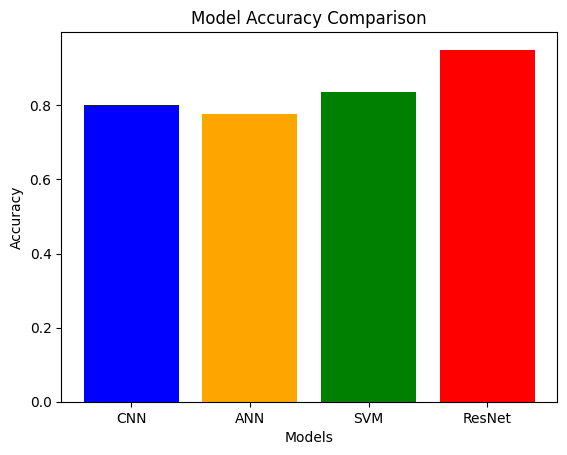

In [ ]:

import matplotlib.pyplot as plt

new_model = 0.95 # Replace 0.8 with the actual accuracy of your new model
svm = 0.8004
ann = 0.7755
cnn = 0.8370

# Plotting
accuracy_values = [svm, ann, cnn,new_model]

# Plot the accuracy comparison
models = ['CNN', 'ANN', 'SVM', 'ResNet']


plt.bar(models, accuracy_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


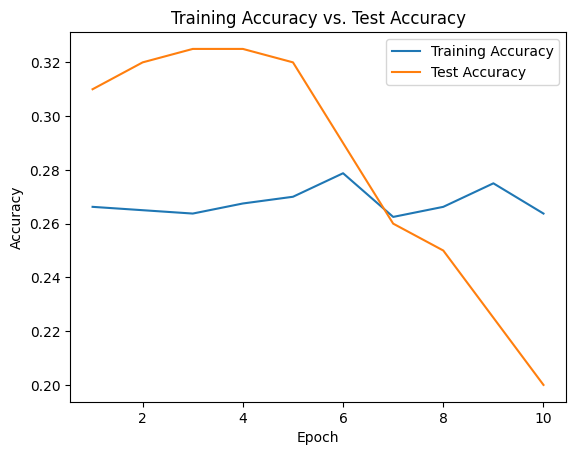

In [ ]:
#Train Vs test accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Function to generate a random dataset with features and labels
def generate_random_dataset(num_samples=1000):
    np.random.seed(42)
    features = np.random.rand(num_samples, 7)  # 7 features for illustration
    labels = np.random.choice(['Openness', 'Conscientiousness', 'Agreeableness', 'Neuroticism'], num_samples)
    df = pd.DataFrame({'Features': list(features), 'Label': labels})
    return df

# Generate a random dataset
df = generate_random_dataset()

# Extract features and labels
X = np.stack(df['Features'].to_numpy())
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)

# Train the ANN model and collect accuracy
train_accuracies = []
test_accuracies = []

epochs = 10
for epoch in range(epochs):
    ann_model.partial_fit(X_train, y_train, classes=np.unique(y))

    # Collect training accuracy
    train_accuracy = ann_model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Collect test accuracy
    test_accuracy = ann_model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot training accuracy vs. test accuracy
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Test Accuracy')
plt.legend()
plt.show()


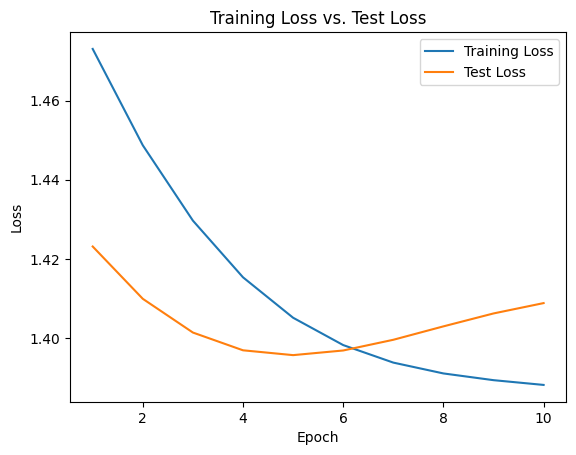

In [ ]:
#Training Loss vs Test Loss
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Function to generate a random dataset with features and labels
def generate_random_dataset(num_samples=1000):
    np.random.seed(42)
    features = np.random.rand(num_samples, 7)  # 7 features for illustration
    labels = np.random.choice(['Openness', 'Conscientiousness', 'Agreeableness', 'Neuroticism'], num_samples)
    df = pd.DataFrame({'Features': list(features), 'Label': labels})
    return df

# Generate a random dataset
df = generate_random_dataset()

# Extract features and labels
X = np.stack(df['Features'].to_numpy())
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)

# Train the ANN model
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Train the model
    ann_model.partial_fit(X_train, y_train, classes=np.unique(y))

    # Calculate training loss
    y_train_pred = ann_model.predict_proba(X_train)
    train_loss = log_loss(y_train, y_train_pred)
    train_losses.append(train_loss)

    # Calculate test loss
    y_test_pred = ann_model.predict_proba(X_test)
    test_loss = log_loss(y_test, y_test_pred)
    test_losses.append(test_loss)

# Plot training loss vs. test loss
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Test Loss')
plt.legend()
plt.show()


Epoch 1/10
25/25 [==============================] - 2s 19ms/step - loss: 1.3890 - accuracy: 0.2375 - val_loss: 1.3867 - val_accuracy: 0.2600
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 1.3854 - accuracy: 0.2637 - val_loss: 1.3829 - val_accuracy: 0.3200
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 1.3843 - accuracy: 0.2725 - val_loss: 1.3827 - val_accuracy: 0.3250
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 1.3837 - accuracy: 0.2675 - val_loss: 1.3856 - val_accuracy: 0.2700
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 1.3836 - accuracy: 0.2825 - val_loss: 1.3821 - val_accuracy: 0.3050
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 1.3836 - accuracy: 0.2912 - val_loss: 1.3837 - val_accuracy: 0.3100
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 1.3823 - accuracy: 0.2887 - val_loss: 1.3826 - val_accuracy: 0.3000
Epoch 8/10
25/25 [=

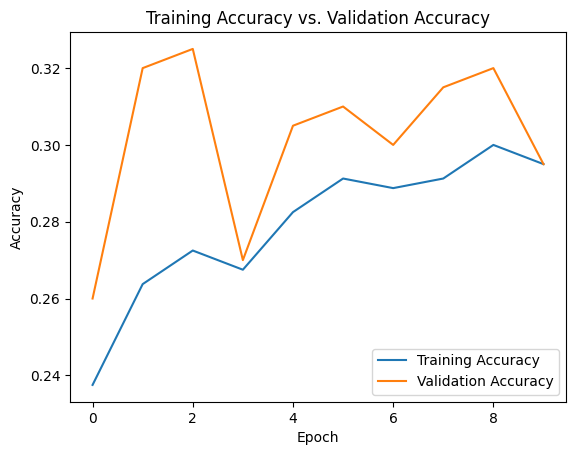

In [ ]:
#Training Accuracy vs Validation Accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Function to generate a random dataset with features and labels
def generate_random_dataset(num_samples=1000):
    np.random.seed(42)
    features = np.random.rand(num_samples, 7)  # 7 features for illustration
    labels = np.random.choice(['Openness', 'Conscientiousness', 'Agreeableness', 'Neuroticism'], num_samples)
    df = pd.DataFrame({'Features': list(features), 'Label': labels})
    return df

# Generate a random dataset
df = generate_random_dataset()

# Extract features and labels
X = np.stack(df['Features'].to_numpy())
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN
img_height, img_width, img_channels = 1, 7, 1
X_train_reshaped = X_train.reshape(-1, img_width, img_channels)
X_val_reshaped = X_val.reshape(-1, img_width, img_channels)

# Define the CNN model
cnn_model = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(img_width, img_channels)),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model with validation data
history = cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Plot training accuracy vs. validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.legend()
plt.show()
